In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
np.random.seed(1) # set a seed so that the results are consistent

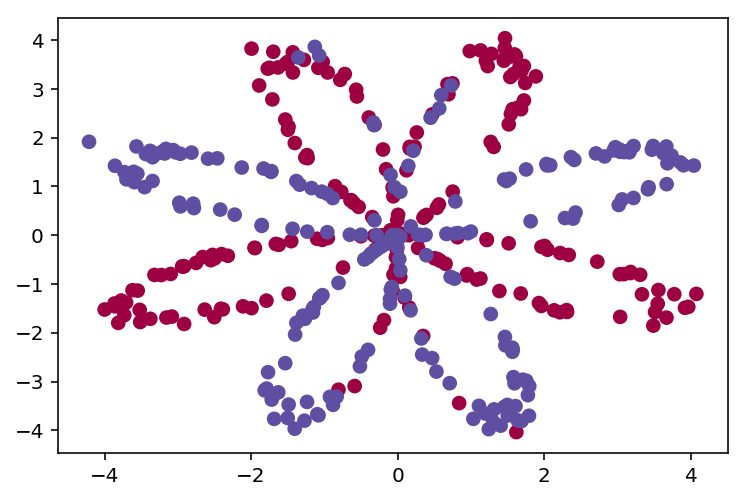

In [2]:
X, Y = load_planar_dataset()
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [3]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]  # training set size

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [4]:
X.T.shape

(400, 2)

In [5]:
from sklearn.model_selection import train_test_split
def my_splitter(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=0.3, random_state=1)
    X_train, X_test, Y_train, Y_test = X_train.T, X_test.T, Y_train.T, Y_test.T
    return X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test = my_splitter(X,Y)

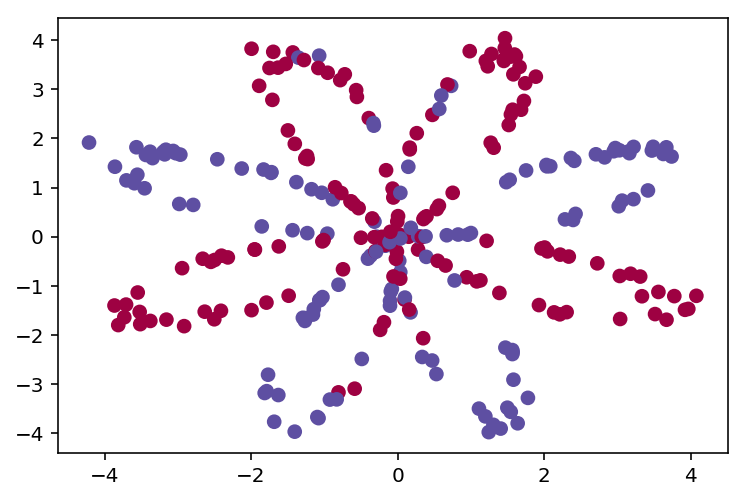

In [6]:
plt.scatter(X_train[0, :], X_train[1, :], c=Y_train, s=40, cmap=plt.cm.Spectral);

In [7]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X_train.T, Y_train.T);

/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 45 % (percentage of correctly labelled datapoints)


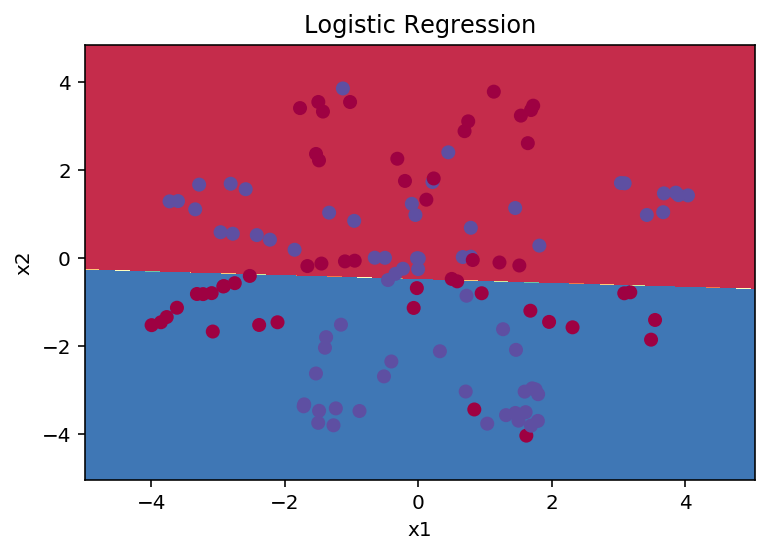

In [8]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X_test, Y_test)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X_test.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y_test,LR_predictions) + np.dot(1-Y_test,1-LR_predictions))/float(Y_test.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [9]:
def layer_sizes(X, Y):
    n_x = X.shape[0] # size of input layer
    n_h = 4 # size of hidden layer
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

In [10]:
layer_sizes(X_train, Y_train)

(2, 4, 1)

In [11]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [12]:
n_x, n_h, n_y = layer_sizes(X_train, Y_train)
initialize_parameters(n_x, n_h, n_y)

{'W1': array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
 'W2': array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
 'b1': array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
 'b2': array([[ 0.]])}

In [13]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
 
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [14]:
parameters = initialize_parameters(n_x, n_h, n_y)
forward_propagation(X_train, parameters)

(array([[ 0.49997581,  0.49942031,  0.50048534,  0.50011448,  0.49958041,
          0.49998747,  0.50035941,  0.49976668,  0.49974586,  0.49968229,
          0.49965668,  0.50003924,  0.50037816,  0.49985712,  0.49985333,
          0.50010581,  0.49988385,  0.5004253 ,  0.5000097 ,  0.50053676,
          0.49970855,  0.49951599,  0.50004878,  0.5000016 ,  0.5002915 ,
          0.49996095,  0.50042598,  0.4997955 ,  0.49946476,  0.49967577,
          0.49973471,  0.4996522 ,  0.50015381,  0.49962726,  0.50022066,
          0.49959856,  0.50000735,  0.50005043,  0.50015797,  0.50026406,
          0.4997265 ,  0.4999516 ,  0.50052053,  0.50011132,  0.49997036,
          0.49974041,  0.49988374,  0.50006461,  0.49990157,  0.5000273 ,
          0.49973146,  0.50008786,  0.49994356,  0.50011203,  0.50032445,
          0.49984568,  0.50001945,  0.49994591,  0.4996635 ,  0.49992014,
          0.49948862,  0.5000224 ,  0.50040981,  0.50050763,  0.49968658,
          0.49966707,  0.49989719,  0.

In [15]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1] # number of example
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y)
    cost = - np.sum(logprobs) * (1./m)
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [16]:
A2, cache = forward_propagation(X_train, parameters)
compute_cost(A2, Y_train, parameters)

0.69306930676258993

In [17]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2-Y
    dW2 = 1./m*(np.dot(dZ2,A1.T))
    db2 = (1./m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2) * (1-np.power(A1,2))
    dW1 = (1./m)*np.dot(dZ1,X.T)
    db1 = (1./m)*np.sum(dZ1,axis=1,keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [18]:
backward_propagation(parameters, cache, X_train, Y_train)

{'dW1': array([[ -1.21554923e-04,  -1.79631041e-03],
        [ -9.53226736e-05,  -1.54039872e-03],
        [  6.50302148e-05,   9.36971158e-04],
        [  2.59295840e-04,   3.88002324e-03]]),
 'dW2': array([[-0.00014341,  0.00254475, -0.00163728, -0.00205458]]),
 'db1': array([[-0.00030199],
        [-0.00025995],
        [ 0.00015731],
        [ 0.00065414]]),
 'db2': array([[ 0.02854419]])}

In [19]:
def update_parameters(parameters, grads, learning_rate = 1.2):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [20]:
grads = backward_propagation(parameters, cache, X_train, Y_train)
update_parameters(parameters, grads)

{'W1': array([[-0.00402171,  0.0015929 ],
        [-0.02124757,  0.01825119],
        [-0.01801239, -0.00954184],
        [ 0.00471766, -0.01710891]]),
 'W2': array([[-0.01040743, -0.01214378,  0.00747928,  0.02538758]]),
 'b1': array([[ 0.00036239],
        [ 0.00031195],
        [-0.00018877],
        [-0.00078497]]),
 'b2': array([[-0.03425303]])}

In [21]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):

    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [22]:
nn_model(X_train, Y_train, 4, num_iterations=10000, print_cost=True)

Cost after iteration 0: 0.693069
Cost after iteration 1000: 0.286010
Cost after iteration 2000: 0.266050
Cost after iteration 3000: 0.255908
Cost after iteration 4000: 0.250042
Cost after iteration 5000: 0.246246
Cost after iteration 6000: 0.243599
Cost after iteration 7000: 0.241648
Cost after iteration 8000: 0.240151
Cost after iteration 9000: 0.238967


{'W1': array([[ -0.28523244,  -8.06341484],
        [-10.69022014,  13.57000487],
        [  1.6633959 ,  -2.45291602],
        [-11.58666726, -13.67997228]]),
 'W2': array([[-11.85712656,  -6.36439736,   2.96736103,   7.0382314 ]]),
 'b1': array([[-0.0287338 ],
        [ 0.04393198],
        [-7.79270217],
        [-0.12676703]]),
 'b2': array([[ 2.53302337]])}

In [23]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

In [24]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219430
Cost after iteration 9000: 0.218551


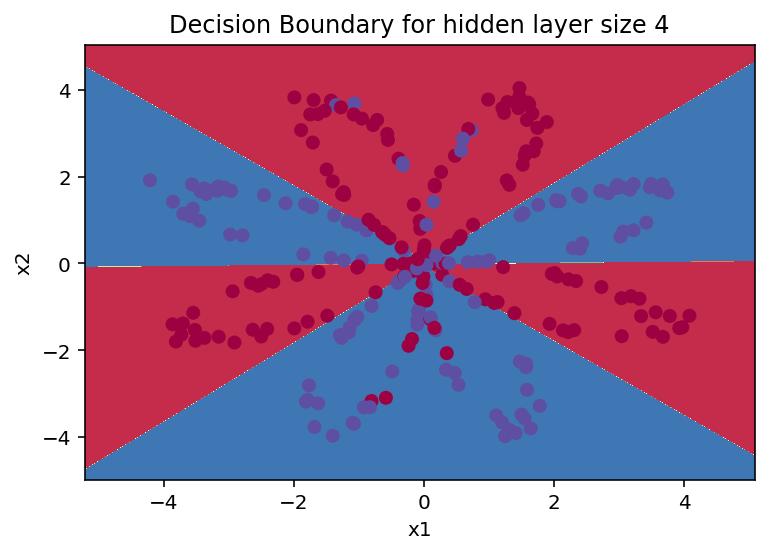

In [25]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X_train, Y_train)
plt.title("Decision Boundary for hidden layer size " + str(4))

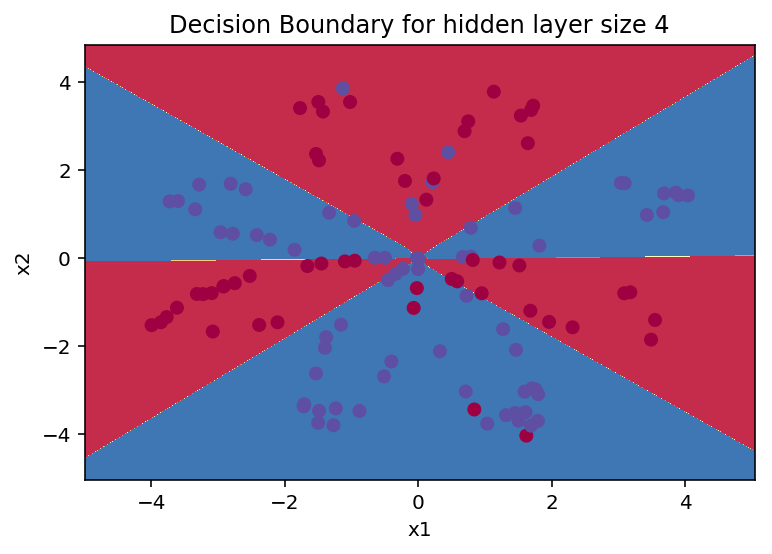

In [26]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X_test, Y_test)
plt.title("Decision Boundary for hidden layer size " + str(4))

Accuracy for 1 hidden units: Train set 65.71%,  Test set 61.67%
Accuracy for 2 hidden units: Train set 65.71%,  Test set 65.83%
Accuracy for 3 hidden units: Train set 90.36%,  Test set 86.67%
Accuracy for 4 hidden units: Train set 90.00%,  Test set 86.67%
Accuracy for 5 hidden units: Train set 90.00%,  Test set 90.83%
Accuracy for 20 hidden units: Train set 91.07%,  Test set 87.50%
Accuracy for 50 hidden units: Train set 91.07%,  Test set 85.83%


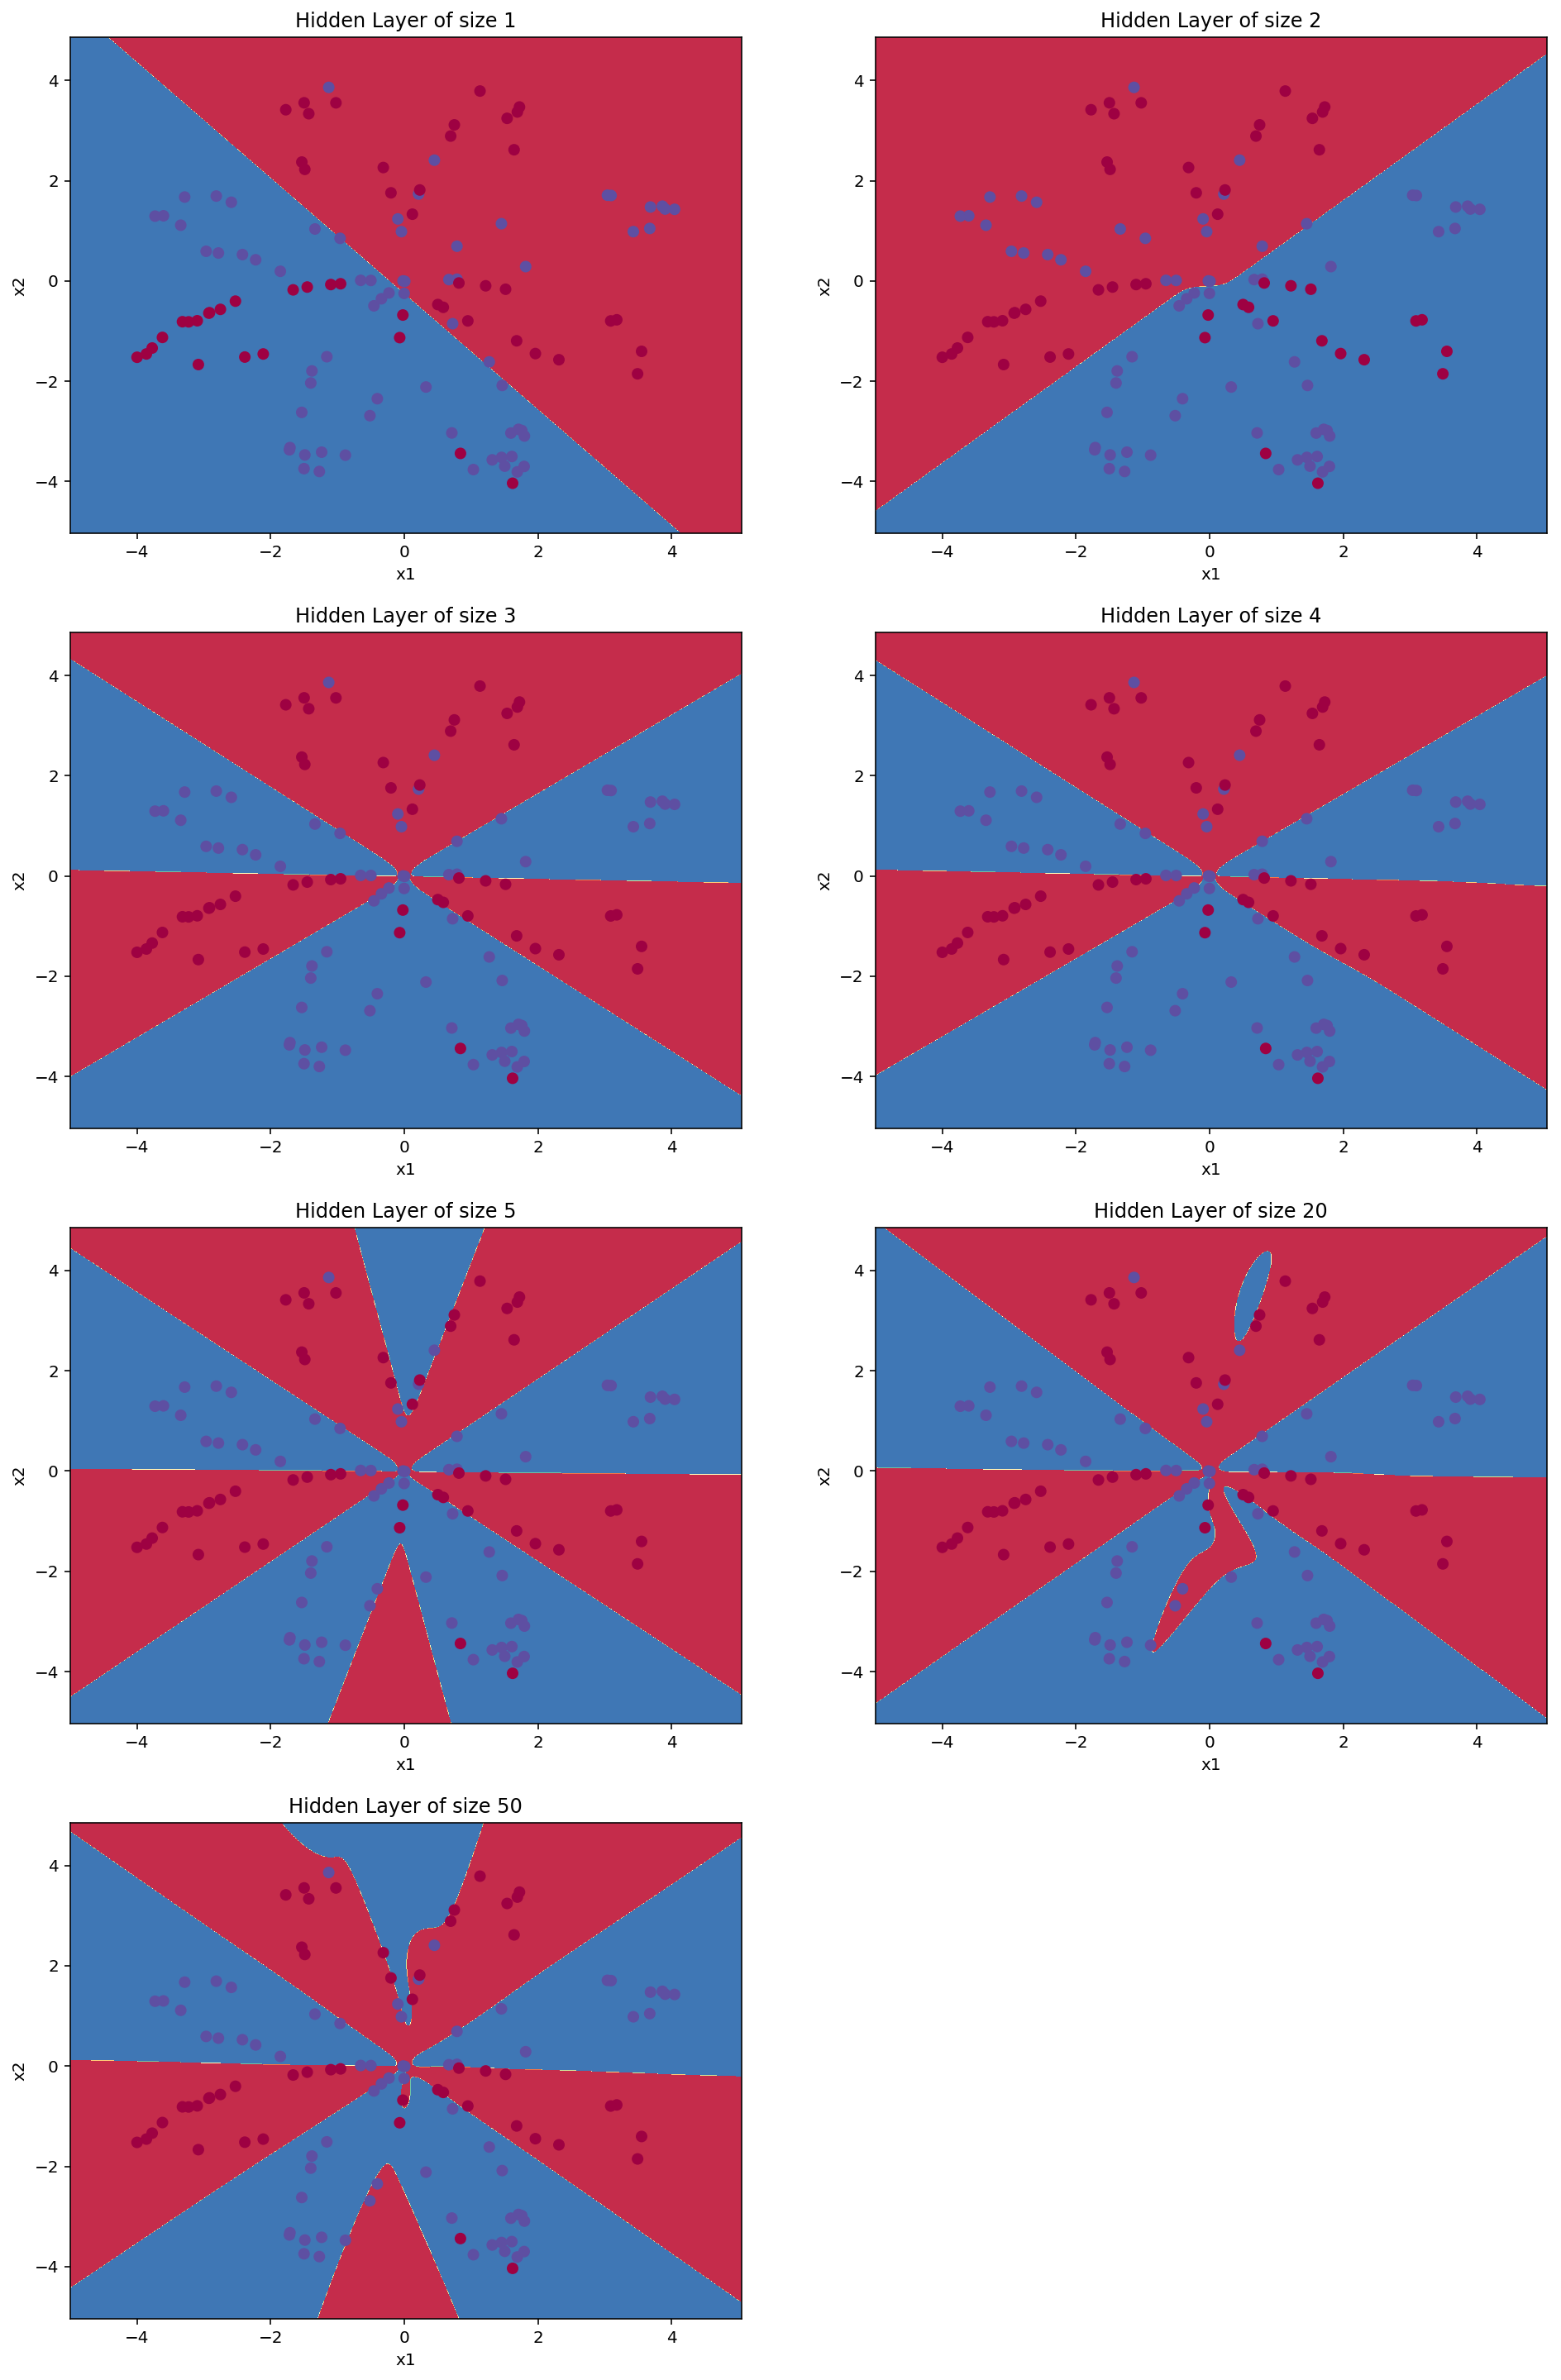

In [27]:
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
def hl_comparison_plotter(X_train, X_test, Y_train, Y_test):
    plt.figure(figsize=(16, 32))
    for i, n_h in enumerate(hidden_layer_sizes):
        plt.subplot(5, 2, i+1)
        plt.title('Hidden Layer of size %d' % n_h)
        parameters = nn_model(X_train, Y_train, n_h, num_iterations = 5000)
        plot_decision_boundary(lambda x: predict(parameters, x.T), X_test, Y_test)
        train_predictions = predict(parameters, X_train)
        test_predictions = predict(parameters, X_test)
        train_accuracy = float((np.dot(Y_train,train_predictions.T) + np.dot(1-Y_train,1-train_predictions.T))/float(Y_train.size)*100)
        test_accuracy = float((np.dot(Y_test,test_predictions.T) + np.dot(1-Y_test,1-test_predictions.T))/float(Y_test.size)*100)
        print ("Accuracy for {} hidden units: Train set {:.2f}%,  Test set {:.2f}%".format(n_h, train_accuracy, test_accuracy))
hl_comparison_plotter(X_train, X_test, Y_train, Y_test)

In [34]:
10%9

1

In [45]:
t = [96.,97.,95.,99.,94.]
np.max(t)

99.0

In [48]:
def accuracy_plotter(X_train, X_test, Y_train, Y_test, max_hu):
    hidden_layer_test = range(1,max_hu+1)
    train_accuracies = []
    test_accuracies = []
    for n_h in hidden_layer_test:
        parameters = nn_model(X_train, Y_train, n_h, num_iterations = 5000)
        train_predictions = predict(parameters, X_train)
        test_predictions = predict(parameters, X_test)
        train_accuracy = float((np.dot(Y_train,train_predictions.T) + np.dot(1-Y_train,1-train_predictions.T))/float(Y_train.size)*100)
        test_accuracy = float((np.dot(Y_test,test_predictions.T) + np.dot(1-Y_test,1-test_predictions.T))/float(Y_test.size)*100)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        if n_h % 10 == 0:
            print "Accuracies with",n_h,"hidden units calculated"
    print "The highest train accracy is",np.max(train_accuracies),"% with",np.argmax(train_accuracies)+1,"hidden units"
    print "The highest test accracy is",np.max(test_accuracies),"% with",np.argmax(test_accuracies)+1,"hidden units"    
    plt.figure(figsize=(8,6))
    plt.plot(hidden_layer_test, train_accuracies, color='r',label='Train accuracy')
    plt.plot(hidden_layer_test, test_accuracies, color='b',label='Test accuracy')
    plt.grid()
    plt.legend(loc='best')

Accuracies with 10 hidden units calculated
Accuracies with 20 hidden units calculated
Accuracies with 30 hidden units calculated
Accuracies with 40 hidden units calculated
Accuracies with 50 hidden units calculated
Accuracies with 60 hidden units calculated
Accuracies with 70 hidden units calculated
Accuracies with 80 hidden units calculated
Accuracies with 90 hidden units calculated
Accuracies with 100 hidden units calculated
The highest train accracy is 92.8571428571 % with 45 hidden units
The highest test accracy is 92.5 % with 8 hidden units


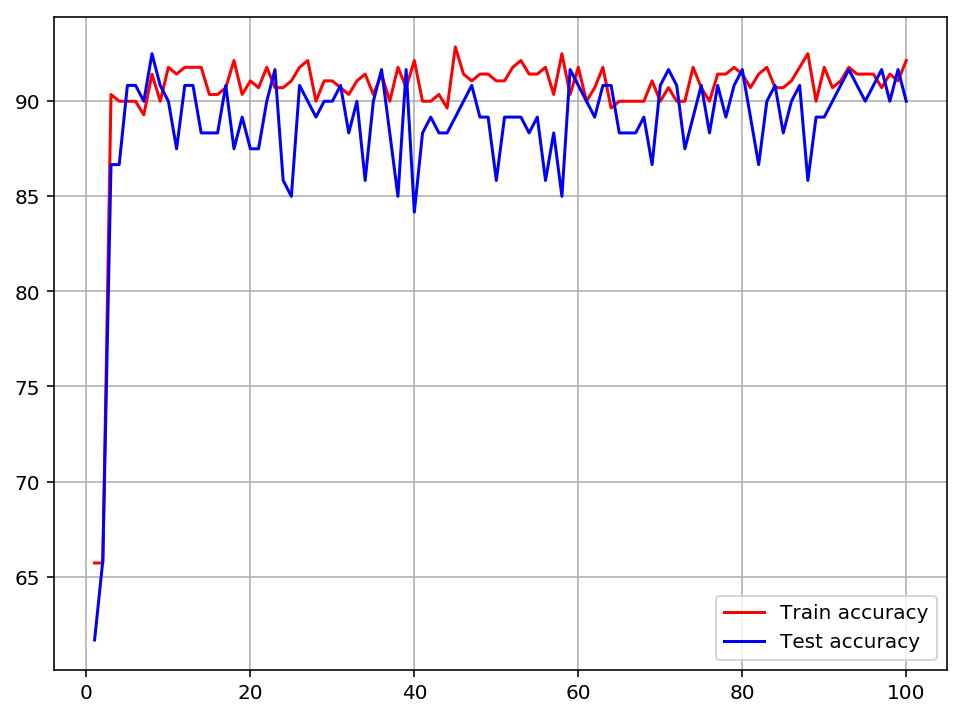

In [49]:
accuracy_plotter(X_train, X_test, Y_train, Y_test, 100)

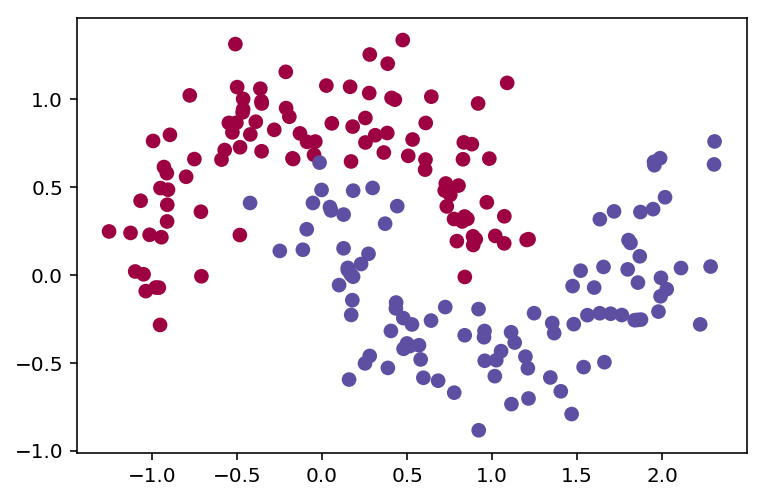

In [41]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_moons"
X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])


if dataset == "blobs":
    Y = Y%2

plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [ ]:
X_train, X_test, Y_train, Y_test = my_splitter(X,Y)
hl_comparison_plotter(X_train, X_test, Y_train, Y_test)